<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [115]:
#Importation de la librairie Pandas
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
#Importation de la librairie plotly express
import plotly.express as px

In [117]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
##=> dataframe.columns
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
print("https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe")
print("https://medium.com/@akaivdo/how-to-show-all-columns-and-rows-of-dataframe-in-pandas-c0caf099615d")

https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe
https://medium.com/@akaivdo/how-to-show-all-columns-and-rows-of-dataframe-in-pandas-c0caf099615d


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [118]:
#Importation du fichier web.xlsx
df_web = pd.read_excel('web.xlsx')
#Importation du fichier erp.xlsx
df_erp = pd.read_excel('erp.xlsx')
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel('liaison.xlsx')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [119]:
#Afficher les dimensions du dataset
print ("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [120]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s), dont les types sont :".format(df_erp.shape[1]))
#La nature des données dans chacune des colonnes
print(df_erp.dtypes)
print('')
#Le nombre de valeurs présentes dans chacune des colonnes
print("Nombre de valeurs par colonnes")
print(df_erp.count())

Le tableau comporte 6 colonne(s), dont les types sont :
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

Nombre de valeurs par colonnes
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [121]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [122]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp['product_id'].is_unique

True

In [123]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp['stock_status'].value_counts()

stock_status
instock       733
outofstock     92
Name: count, dtype: int64

In [124]:
#À quelle(s) autre(s) colonne(s) sont-elles liées ? --> Stock_quantity
df_erp.loc[df_erp['stock_status']=="outofstock"].head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
2,3850,1,20.8,0,outofstock,10.64
4,4039,1,46.0,3,outofstock,23.77
8,4043,1,60.0,0,outofstock,29.45
11,4047,1,18.3,0,outofstock,9.93
15,4051,1,7.7,0,outofstock,4.14


In [125]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status2'] = np.where(df_erp['stock_quantity'] <= 0, 'outofstock', 'instock')

In [126]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


In [127]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter
df_erp.loc[df_erp['stock_status'] != df_erp['stock_status2']]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [128]:
#Transfert des données Stock Status2, Stock Status
df_erp['stock_status'] = df_erp['stock_status2']

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [129]:
df_erp["price"].describe()

count    825.000000
mean      32.187697
std       26.712077
min      -20.000000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [130]:
print("Les résultats détaillés sont :")
print("La variance est de {}".format(round(df_erp["price"].var(),2)))
print("L'ecart type est de {}".format(round(df_erp["price"].std(),2)))
print("La moyenne est de {}".format(round(df_erp["price"].mean(),2)))
print("Le mode est de {}".format(df_erp["price"].mode().iloc[0]))
print("Le médian est de {}".format(df_erp["price"].median()))
print("Le skew est de {} soit asymétrie positive".format(round(df_erp["price"].skew(),2)))
print("Le kurtotsis est de {} soit leptokurtique".format(round(df_erp["price"].kurtosis(),2)))

Les résultats détaillés sont :
La variance est de 713.54
L'ecart type est de 26.71
La moyenne est de 32.19
Le mode est de 45.0
Le médian est de 24.3
Le skew est de 2.6 soit asymétrie positive
Le kurtotsis est de 10.72 soit leptokurtique


In [131]:
df_erp.loc[df_erp['price'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


In [132]:
print("Il y a {} outliers".format(df_erp.loc[df_erp['price'] > 83].shape[0]))

Il y a 36 outliers


In [133]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Prix non renseigné ?
print("Il y a {} prix non renseigné".format(df_erp['price'].isnull().sum()))

Il y a 0 prix non renseigné


In [134]:
#Prix négatif ?
print("Il y a {} prix négatif".format((df_erp['price']<0).sum()))

Il y a 3 prix négatif


In [135]:
#Prix nul ?
print("Il y a {} prix nul(s)".format((df_erp['price']==0).sum()))

Il y a 0 prix nul(s)


In [136]:
#Afficher le prix minimum de la colonne "price"
print("Le prix minimum est : {} euros".format(df_erp['price'].loc[df_erp['price']< 0].min()))
#Afficher le prix maximum de la colonne "price"
print("Le prix maximum est : {} euros".format(df_erp['price'].loc[df_erp['price'] > 0].max()))
print ('-----')
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print('Voici les prix inférieurs à 0 euro, et les index concernés')
df_erp['price'].loc[df_erp['price'] < 0]

Le prix minimum est : -20.0 euros
Le prix maximum est : 225.0 euros
-----
Voici les prix inférieurs à 0 euro, et les index concernés


151   -20.0
469    -8.0
739    -9.1
Name: price, dtype: float64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [137]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("Le stock minimum est : {} article(s)".format(df_erp['stock_quantity'].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("Le stock maximum est : {} articles".format(df_erp['stock_quantity'].max()))
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print('voici les stocks indiqués inférieurs à O article :')
df_erp.loc[df_erp['stock_quantity']<0]

Le stock minimum est : -10 article(s)
Le stock maximum est : 145 articles
voici les stocks indiqués inférieurs à O article :


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


In [138]:
#mise à 0 des stocks minimum
df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [139]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].value_counts()
print("Nombre d'articles vendus sur internet avec la distribution empirique d'{}".format(df_erp['onsale_web'].value_counts()))
print("---")
print("répartion des ventes : {}".format(df_erp['onsale_web'].value_counts(normalize = True)*100))

Nombre d'articles vendus sur internet avec la distribution empirique d'onsale_web
1    716
0    109
Name: count, dtype: int64
---
répartion des ventes : onsale_web
1    86.787879
0    13.212121
Name: proportion, dtype: float64


In [140]:
#Quelles sont les colonnes à conserver selon vous?
## Toutes exceptée stock_status qui a été corrigée par stock_status2
df_erp.columns.tolist()

['product_id',
 'onsale_web',
 'price',
 'stock_quantity',
 'stock_status',
 'purchase_price',
 'stock_status2']

In [141]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp.drop(['stock_status2'], axis = 1, inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [142]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Il y a actuellement {} prix non renseigné(s) dans la colonne purchase_price".format(df_erp['purchase_price'].isna().sum()))
#Afficher le prix minimum de la colonne "purchase_price"
print("Le prix d'achat minimum est de {} Euros".format(df_erp['purchase_price'].min()))
#Afficher le prix maximum de la colonne "purchase_price"
print("Le prix d'achat maximum est de {} Euros".format(df_erp['purchase_price'].max()))

Il y a actuellement 0 prix non renseigné(s) dans la colonne purchase_price
Le prix d'achat minimum est de 2.74 Euros
Le prix d'achat maximum est de 137.81 Euros


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [143]:
#Dimension du dataset
print(df_web.shape)
#Nombre d'observations
print ("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
#Nombre de caractéristiques

(1513, 29)
Le tableau comporte 1513 observation(s) ou article(s)


In [144]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))


Le tableau comporte 29 colonne(s)


In [145]:
#La nature des données dans chacune des colonnes
df_web.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [146]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.count()

sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
product_type             1429
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64

In [147]:
#Selon vous, quelles sont les colonnes à conserver ?

In [148]:
##Liste des colonnes qui n'ont que des "0" et "nan" en exluant ce qui est texte et date
col2sup0 = []
for col1 in df_web.select_dtypes(include=['int', 'float']).columns:
    if df_web[col1].sum() == 0:
      col2sup0.append(col1)

In [149]:
col2sup0

['virtual',
 'downloadable',
 'rating_count',
 'average_rating',
 'tax_class',
 'post_content',
 'post_password',
 'post_content_filtered',
 'post_parent',
 'menu_order',
 'comment_count']

In [150]:
df_web.drop((col2sup0),axis =1, inplace = True)

In [151]:
df_web.count()

sku                  1428
total_sales          1430
tax_status            716
post_author          1430
post_date            1430
post_date_gmt        1430
product_type         1429
post_title           1430
post_excerpt          716
post_status          1430
comment_status       1430
ping_status          1430
post_name            1430
post_modified        1430
post_modified_gmt    1430
guid                 1430
post_type            1430
post_mime_type        714
dtype: int64

In [152]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web[~df_web['sku'].apply(lambda x: isinstance(x, (int))) & (df_web['sku'].notnull())]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
272,13127-1,4.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
842,bon-cadeau-25-euros,7.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Autre,Bon cadeau de 25€,NaN,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1117,13127-1,4.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1387,bon-cadeau-25-euros,7.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [153]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?

In [154]:
#Identifier les lignes sans code articles
df_web.loc[(df_web['sku'].isnull()) & (df_web['post_author'].notnull())]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
1084,NaN,-56.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1087,NaN,-17.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [155]:
df_web[df_web['post_type'] == "product"]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
2,14692,5.0,taxable,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,15328,2.0,taxable,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
6,16515,10.0,taxable,2.0,2018-06-02 09:31:31,2018-06-02 07:31:31,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,"<div id=""wrapper"">\n<div id=""container-wrapper...",publish,closed,closed,chateau-turcaud-bordeaux-rouge-cuvee-majeure-2018,2020-08-27 10:11:12,2020-08-27 08:11:12,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
11,16585,15.0,taxable,2.0,2018-02-16 14:03:16,2018-02-16 13:03:16,Vin,Xavier Frissant Touraine Sauvignon 2019,"Un joli sauvignon frais et minéral, avec d'int...",publish,closed,closed,xavier-frissant-touraine-sauvignon-2019,2020-08-27 09:30:36,2020-08-27 07:30:36,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
14,12869,7.0,taxable,2.0,2019-03-28 14:29:35,2019-03-28 13:29:35,Vin,Stéphane Tissot Arbois D.D. 2016,"Un Vin coloré et éclatant. Le nez est fruité, ...",publish,closed,closed,stephane-tissot-arbois-dd-2016,2019-12-13 15:40:01,2019-12-13 14:40:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,13074,4.0,taxable,2.0,2018-02-12 14:25:28,2018-02-12 13:25:28,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,"""L'Avenue"" est issue d’une parcelle de vieux g...",publish,closed,closed,chateau-de-vaudieu-chateauneuf-du-pape-lavenue...,2019-12-09 10:40:03,2019-12-09 09:40:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1505,16322,0.0,taxable,2.0,2018-02-15 13:51:32,2018-02-15 12:51:32,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,Belle complexité aromatique alliant fruits rou...,publish,closed,closed,moulin-gassac-igp-pays-herault-guilhem-rouge-2019,2020-08-26 16:05:03,2020-08-26 14:05:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1507,12365,10.0,taxable,2.0,2019-01-29 15:53:05,2019-01-29 14:53:05,Vin,Parés Baltà Penedès Electio 2013,Une cuvée produite avec une très vieille vigne...,publish,closed,closed,pares-balta-penedes-electio-2013,2020-08-08 17:45:02,2020-08-08 15:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1508,16326,5.0,taxable,2.0,2019-04-18 11:32:46,2019-04-18 09:32:46,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,"Sur le millésime 2017, Au Capceu du domaine Ca...",publish,closed,closed,camin-larredya-jurancon-moelleux-capceu-2018,2020-08-27 09:24:46,2020-08-27 07:24:46,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [156]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
df_web = df_web[df_web['post_type'] == "product"]

In [157]:
df_web.shape

(716, 18)

In [158]:
df_web.reset_index(drop=True, inplace=True)

In [159]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
print("Il y a {} doublons".format(df_web['sku'].duplicated().sum()))

Il y a 1 doublons


In [160]:
df_web.loc[(df_web['sku'].isnull())]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
521,NaN,-56.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
522,NaN,-17.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [161]:
df_web.loc[df_web.index[521], "sku"] = "inconnu1"
df_web.loc[df_web.index[522], "sku"] = "inconnu2"

In [162]:
df_web["post_type"].value_counts()

post_type
product    716
Name: count, dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [163]:
#Dimension du dataset
print("Les dimensions de df_liaison est {}".format(df_liaison.shape))
#Nombre d'observations
print("Nombre d'observation est de {}".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print("Il possède {} caractéristiques".format(df_liaison.shape[1]))

Les dimensions de df_liaison est (825, 2)
Nombre d'observation est de 825
Il possède 2 caractéristiques


In [164]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
print(df_liaison.info())
#Le nombre de valeurs présentes dans chacune des colonnes
print("La table contient {} colonnes".format(df_liaison.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None
La table contient 2 colonnes


In [165]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison['product_id'].is_unique

True

In [166]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison['id_web'].is_unique

False

In [167]:
df_liaison.loc[df_liaison['id_web'].duplicated()]

,id_web,product_id
49,NaN,4090
50,NaN,4092
119,NaN,4195
131,NaN,4209
151,NaN,4233
...,...,...
817,NaN,7196
818,NaN,7200
819,NaN,7201
820,NaN,7203


In [168]:
#Avons-nous des articles sans correspondances?
print("Voici le nombre d'article sans correspondance {}".format(df_liaison['product_id'].count() - df_liaison['id_web'].count()))

Voici le nombre d'article sans correspondance 91


In [169]:
df_liaison.loc[~df_liaison['id_web'].apply(lambda x: isinstance(x, (int))) & (df_liaison['id_web'].notnull())]

,id_web,product_id
443,bon-cadeau-25-euros,4954
822,13127-1,7247
823,14680-1,7329


In [170]:
df_liaison.loc[df_liaison['id_web'].apply(lambda x: isinstance(x, (str)))]

,id_web,product_id
443,bon-cadeau-25-euros,4954
822,13127-1,7247
823,14680-1,7329


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [171]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, how='outer', on='product_id')

In [172]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_erp[~df_erp['product_id'].isin(df_liaison['product_id'])]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


In [173]:
df_liaison[~df_liaison['product_id'].isin(df_erp['product_id'])]

,id_web,product_id


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [174]:
df_merge[~df_merge['id_web'].apply(lambda x: isinstance(x, (int))) & (df_merge['id_web'].notnull())]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
443,4954,1,25.0,23,instock,13.30,bon-cadeau-25-euros
822,7247,1,54.8,6,instock,27.18,13127-1
823,7329,0,26.5,14,instock,13.42,14680-1


In [175]:
#Fusionnez les datasets df_merge et df_web
##Renommer les colonnes sku en id_web
df_web2 = df_web.rename(columns={'sku': 'id_web'})

In [176]:
df_total = pd.merge(df_merge, df_web2, how='outer', on='id_web')

In [177]:
#Avons-nous des lignes sans correspondances?> suppression des lignes sans correpondance Id_web=NaN
df_total = df_total[~df_total['id_web'].isnull()]

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

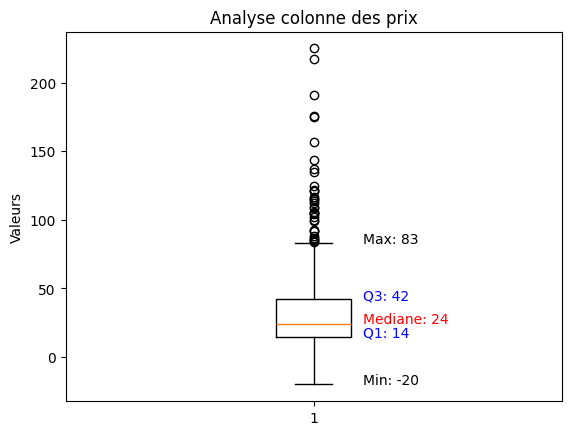

In [178]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
box = plt.boxplot(df_erp["price"], showfliers = True)
stats = box["medians"][0].get_ydata()[0]  # Médiane
q1 = box["boxes"][0].get_ydata()[1]  # Q1
q3 = box["boxes"][0].get_ydata()[2]  # Q3
whisker_low = box["whiskers"][0].get_ydata()[1]  # Min (hors outliers)
whisker_high = box["whiskers"][1].get_ydata()[1]  # Max (hors outliers)

# Afficher les valeurs sur le graphique
plt.text(1.1, stats, f'Mediane: {stats:.0f}', fontsize=10, color="red")
plt.text(1.1, q1, f'Q1: {q1:.0f}', fontsize=10, color="blue")
plt.text(1.1, q3, f'Q3: {q3:.0f}', fontsize=10, color="blue")
plt.text(1.1, whisker_low, f'Min: {whisker_low:.0f}', fontsize=10, color="black")
plt.text(1.1, whisker_high, f'Max: {whisker_high:.0f}', fontsize=10, color="black")

plt.title("Analyse colonne des prix")
plt.ylabel("Valeurs")
plt.show()

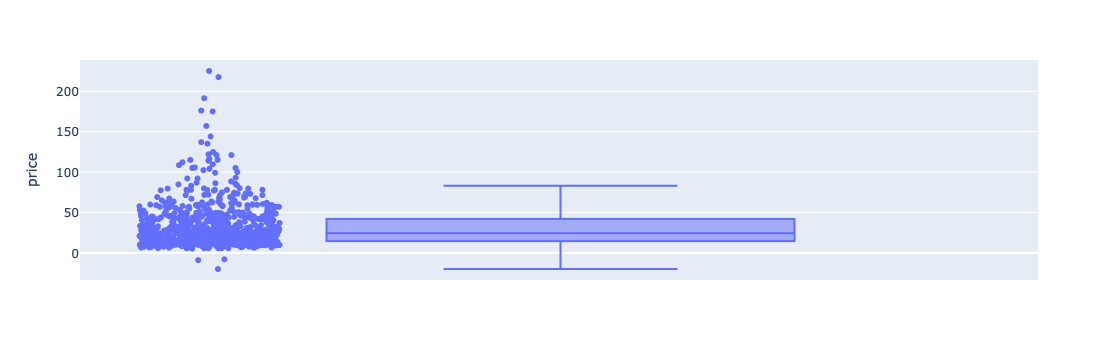

In [179]:
#Autre méthode avec plotly express
px.box(df_erp, y='price', points="all")

<Axes: >

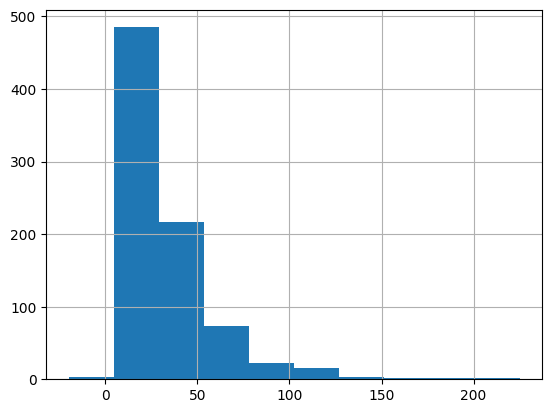

In [180]:
df_erp["price"].hist()

Text(0, 0.5, "Nombre d'occurrences")

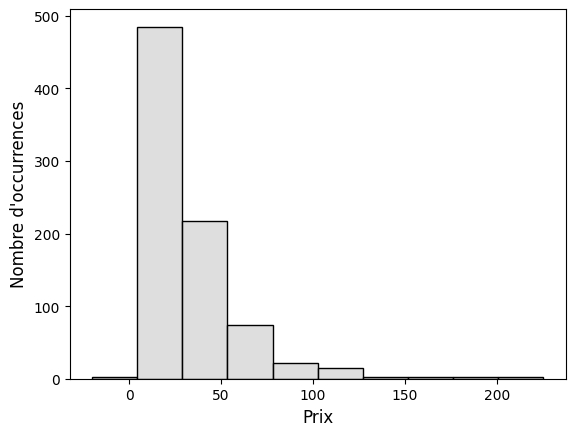

In [181]:
sns.histplot(df_erp["price"], bins=10, color="lightgrey")
plt.xlabel("Prix", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [182]:
##Z-score = (valeur observée - moyenne) / Ecart type
#Calculer la moyenne du prix
print("Le prix moyen est de {} Euros".format(round(df_erp['price'].mean(),2)))
#Calculer l'écart-type du prix
print("L'ecart type du prix est de {} Euros".format(round(df_erp['price'].std(),2)))
#Calculer le Z-score
print("Présentation du z-score")
df_erp['z-score'] = (df_erp['price']-df_erp['price'].mean())/df_erp['price'].std()
print(df_erp["z-score"])

Le prix moyen est de 32.19 Euros
L'ecart type du prix est de 26.71 Euros
Présentation du z-score
0     -0.299029
1      0.079077
2     -0.426313
3     -0.677136
4      0.517081
         ...   
820    0.479645
821    0.479645
822    0.846520
823   -0.212926
824   -0.594776
Name: z-score, Length: 825, dtype: float64


In [183]:
#Quel est le seuil prix dont z-score est supérieur à 3?
print("Le seuil du prix pour un z-score supérieur à 3 = {} euros".format(df_erp['price'][df_erp['z-score']>3].min()))

Le seuil du prix pour un z-score supérieur à 3 = 114.0 euros


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [184]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_erp['price'].describe()

count    825.000000
mean      32.187697
std       26.712077
min      -20.000000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [185]:
#Définissez un seuil pour les articles "outliers" en prix
## Calcul de l'intervalle interquartile (IQR) IQR=Q3−Q1 42-14,5
## Seuil limite supérieur = Q3+1,5×IQR
print("IQR = {}".format(42-14.5))
print("Seuil Outliers sup = {}".format(42+(1.5*27.5)))


IQR = 27.5
Seuil Outliers sup = 83.25


In [186]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
print("Le nombre d'article en outliers est de {} ".format(df_erp['product_id'][df_erp["price"]> 83.25].count()))
print("Le nombre total d'article est de {} ".format(df_erp["product_id"].count()))
print("La proportion d'outlier est de  {} %".format(round((df_erp['product_id'][df_erp["price"]> 83.25].count()/df_erp["product_id"].count())*100,2)))

Le nombre d'article en outliers est de 36 
Le nombre total d'article est de 825 
La proportion d'outlier est de  4.36 %


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'purchase_price'}>]], dtype=object)

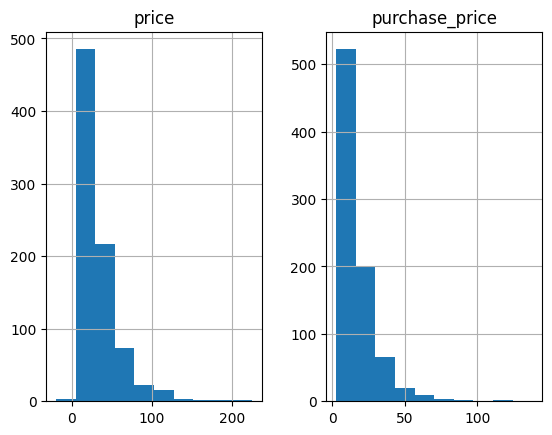

In [187]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
df_erp[["price", "purchase_price"]].hist()

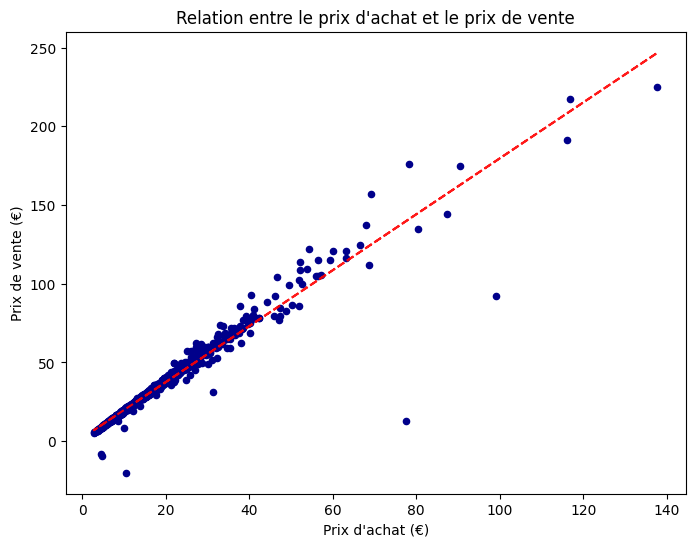

In [188]:
df_erp.plot.scatter(x='purchase_price', y='price', alpha=1, color='darkblue', figsize=(8, 6))
plt.title("Relation entre le prix d'achat et le prix de vente")
plt.xlabel("Prix d'achat (€)")
plt.ylabel("Prix de vente (€)")

z = np.polyfit(df_erp['purchase_price'], df_erp['price'], 1)
p = np.poly1d(z)
plt.plot(df_erp['purchase_price'], p(df_erp['purchase_price']), "r--", alpha=0.9)


In [189]:
print("Identification des produits dont le prix de ventes < 0")
df_erp[df_erp["price"]<0]

Identification des produits dont le prix de ventes < 0


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,z-score
151,4233,0,-20.0,0,outofstock,10.33,-1.953712
469,5017,0,-8.0,0,outofstock,4.34,-1.504477
739,6594,0,-9.1,19,instock,4.61,-1.545657


In [190]:
print("Identification des produits dont le prix d'achat et inférieur aux prix de ventes ")
df_erp[df_erp["price"]<df_erp["purchase_price"]]

Identification des produits dont le prix d'achat et inférieur aux prix de ventes 


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,z-score
151,4233,0,-20.00,0,outofstock,10.33,-1.953712
210,4355,1,12.65,97,instock,77.48,-0.731418
391,4864,0,8.30,0,outofstock,9.99,-0.894266
469,5017,0,-8.00,0,outofstock,4.34,-1.504477
724,6324,0,92.00,18,instock,99.00,2.239148
739,6594,0,-9.10,19,instock,4.61,-1.545657
817,7196,0,31.00,55,instock,31.20,-0.044463


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [191]:
df_total

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,post_author,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,4729.0,1.0,8.6,26.0,instock,4.22,38,10.0,taxable,2.0,...,"Ce Crémant est vif et délicat, gourmand et cro...",publish,closed,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1,4634.0,1.0,41.0,11.0,instock,20.12,41,6.0,taxable,2.0,...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,4141.0,1.0,39.0,123.0,instock,24.86,304,8.0,taxable,2.0,...,"Le nez, ouvert et expressif, évoque les fruits...",publish,closed,closed,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,5932.0,1.0,59.9,13.0,instock,27.18,523,0.0,taxable,2.0,...,Issus des meilleurs crus de Grande et de Petit...,publish,closed,closed,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,5047.0,1.0,22.5,76.0,instock,13.78,531,8.0,taxable,2.0,...,Cuvée bien équilibrée à la fois vive et souple...,publish,closed,closed,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 15:35:03,2020-08-27 13:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,7247.0,1.0,54.8,6.0,instock,27.18,13127-1,4.0,taxable,2.0,...,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
732,7329.0,0.0,26.5,14.0,instock,13.42,14680-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
733,4954.0,1.0,25.0,23.0,instock,13.30,bon-cadeau-25-euros,7.0,taxable,1.0,...,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN,inconnu1,-56.0,taxable,2.0,...,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [192]:
##############################
# Calculer le CA su site web #
##############################
#Créez une colonne calculant le CA par article
df_total = df_total.loc[(df_total["onsale_web"]==1)]
df_total['ca_par_article'] = (df_total['price']*df_total['total_sales'])
#Calculez la somme de la colonne "ca_par_article"
print("Le chiffre d'affaire est de {} euros".format(round(df_total['ca_par_article'].sum(),2)))
#Ce résultat correspond au chiffre d'affaire du site web
print("Il y a une différence de {} Euros".format(round((round(df_total['ca_par_article'].sum(),2))-round(df_total["ca_par_article"][df_total["onsale_web"]==1].sum(),2),2)))

Le chiffre d'affaire est de 143598.9 euros
Il y a une différence de 0.0 Euros


/var/folders/nh/n9hljk5x7bs7pspl75v9v2mh0000gn/T/ipykernel_22191/1085875584.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



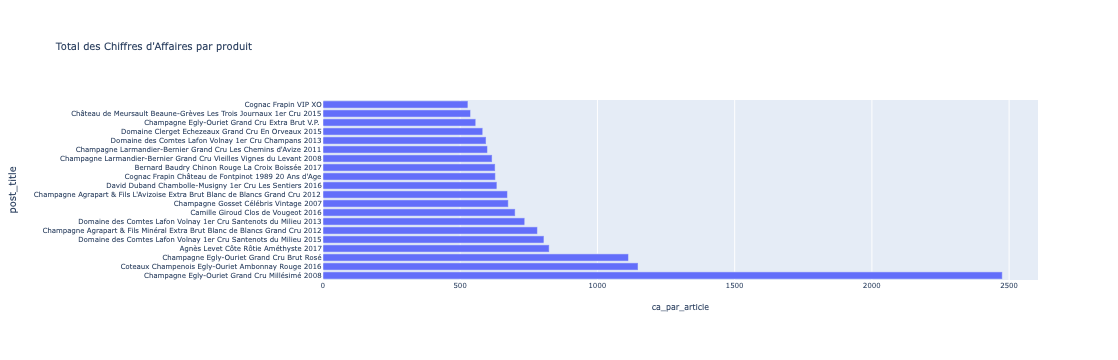

In [193]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge ====> (Merge ou TOTAL)
df_CA = df_total.sort_values('ca_par_article', ascending = False)
#Réinitialiser l'index du dataset par un reset_index
df_CA.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en CA
df_CA.head(20)
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df_CA.head(20), x="ca_par_article", y="post_title", orientation ="h", title="Total des Chiffres d'Affaires par produit")
fig.update_layout(
    title=dict(font=dict(size=10)),   # Taille du titre
    yaxis=dict(title=dict(font=dict(size=10))),  # Taille de l'axe Y
    font=dict(size=7)  # Taille générale du texte (ex. étiquettes)
)

In [194]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_CA["Part_CA"]=(df_CA["ca_par_article"]/df_CA["ca_par_article"].sum())*100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_CA["Part_CA_cumul"]=df_CA["Part_CA"].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
print("Le nombre d'article représentant 80% du chiffre d'affaire est de {}".format(df_CA["product_id"].loc[df_CA["Part_CA_cumul"]<80].count()))
print("Ce groupe représentant une proportion de {}% du nombre d'articles dans le catalogue.".format(round((df_CA["product_id"].loc[df_CA["Part_CA_cumul"]<80].count()/(df_CA["product_id"].loc[df_CA["Part_CA_cumul"]<80].count()+df_CA["product_id"].loc[df_CA["Part_CA_cumul"]>80].count())*100),2)))

Le nombre d'article représentant 80% du chiffre d'affaire est de 433
Ce groupe représentant une proportion de 60.73% du nombre d'articles dans le catalogue.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [195]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
Vente_Total = df_total.sort_values("total_sales", ascending = False)
#Réinitialiser l'index du dataset par un reset_index
Vente_Total.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en quantité
Vente_Total.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,post_author,...,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,ca_par_article
0,4867.0,1.0,9.9,121.0,instock,4.86,16148,36.0,taxable,2.0,...,publish,closed,closed,chateau-de-la-selve-igp-coteaux-de-lardeche-ma...,2020-08-27 09:30:15,2020-08-27 07:30:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,356.4
1,4203.0,1.0,9.9,74.0,instock,5.01,15415,27.0,taxable,2.0,...,publish,closed,closed,mas-laval-igp-pays-herault-pampres-blanc-2018,2020-07-11 16:45:03,2020-07-11 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,267.3
2,4275.0,1.0,14.9,62.0,instock,7.78,14864,24.0,taxable,2.0,...,publish,closed,closed,i-fabbri-chianti-classico-lamole-2017,2020-08-22 14:35:02,2020-08-22 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,357.6
3,4647.0,1.0,28.5,45.0,instock,14.14,16525,22.0,taxable,2.0,...,publish,closed,closed,bernard-baudry-chinon-rouge-croix-boissee-2017,2020-07-31 09:31:39,2020-07-31 07:31:39,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,627.0
4,4726.0,1.0,12.7,0.0,outofstock,6.82,14950,22.0,taxable,2.0,...,publish,closed,closed,francois-baur-pinot-noir-schlittweg-2017,2020-05-06 11:35:01,2020-05-06 09:35:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,279.4
5,6129.0,1.0,5.2,68.0,instock,2.74,14570,20.0,taxable,2.0,...,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,104.0
6,5826.0,1.0,41.2,34.0,instock,21.71,15325,20.0,taxable,2.0,...,publish,closed,closed,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,824.0
7,4220.0,1.0,11.6,48.0,instock,5.75,15758,18.0,taxable,2.0,...,publish,closed,closed,frissant-chenin-pierres-2018,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,208.8
8,6569.0,1.0,29.0,58.0,instock,15.28,15705,17.0,taxable,2.0,...,publish,closed,closed,decelle-villa-chorey-beaune-2016,2020-07-27 11:55:02,2020-07-27 09:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,493.0
9,5803.0,1.0,17.1,47.0,instock,9.19,13572,17.0,taxable,2.0,...,publish,closed,closed,tour-haut-caussan-medoc-2015,2020-08-26 16:55:02,2020-08-26 14:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,290.7


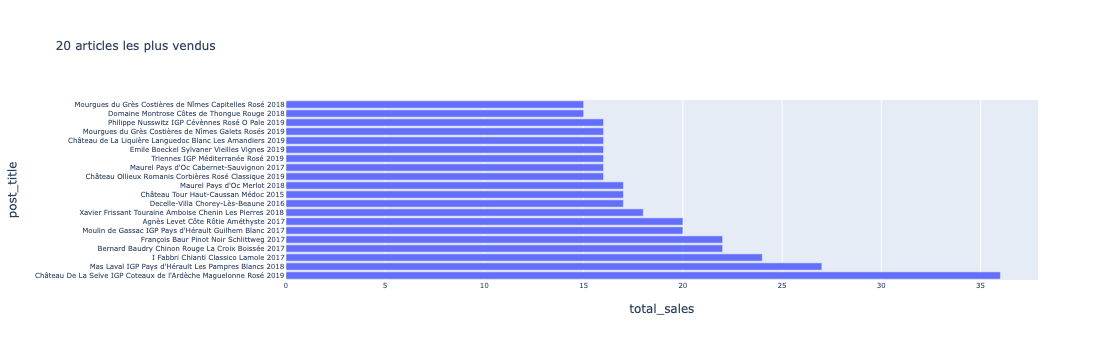

In [196]:
#Graphique en barre des 20 premiers articles avec plotly express
fig =px.bar(Vente_Total[:20], x="total_sales", y="post_title", orientation ="h", title="20 articles les plus vendus")
fig.update_layout(
    title=dict(font=dict(size=12)),   # Taille du titre
    xaxis=dict(title=dict(font=dict(size=12))),  # Taille de l'axe X
    yaxis=dict(title=dict(font=dict(size=12))),  # Taille de l'axe Y
    font=dict(size=7)  # Taille générale du texte (ex. étiquettes)
)

In [197]:
#Ajouter tableau des 20 articles les plus vendus

In [198]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_total["Part_Sales"]=(df_total["total_sales"]/df_total["total_sales"].sum())*100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_total["Part_Sales_cumul"]=df_total["Part_Sales"].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
print("Le nombre d'article représentant 80% du chiffre d'affaire est de {}".format(df_total["product_id"].loc[df_total["Part_Sales_cumul"]<80].count()))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Le groupe représente une proportion de {}% du nombre d'articles dans le catalogue.".format(round((df_total["product_id"].loc[df_total["Part_Sales_cumul"]<80].count()/(df_total["product_id"].loc[df_total["Part_Sales_cumul"]<80].count()+df_total["product_id"].loc[df_total["Part_Sales_cumul"]>80].count())*100),2)))

Le nombre d'article représentant 80% du chiffre d'affaire est de 596
Le groupe représente une proportion de 83.59% du nombre d'articles dans le catalogue.


/var/folders/nh/n9hljk5x7bs7pspl75v9v2mh0000gn/T/ipykernel_22191/1481633442.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nh/n9hljk5x7bs7pspl75v9v2mh0000gn/T/ipykernel_22191/1481633442.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



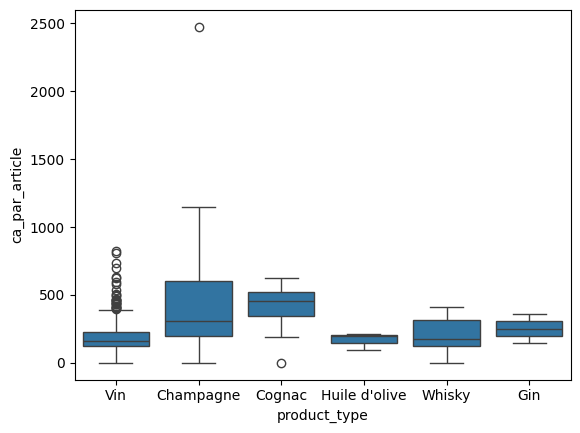

In [199]:
sns.boxplot(y='ca_par_article', x='product_type', data=df_total, orient='v')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [200]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne Rotation de stock
df_total["Rotation_Stock"] = df_total["stock_quantity"] / df_total["total_sales"]
#Remplacement des "inf" par 0
df_total["Rotation_Stock"] = df_total["Rotation_Stock"].replace([np.inf], 0)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_total.sort_values("Rotation_Stock",ascending=False)
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
df_total.sort_values("Rotation_Stock",ascending=False).head(20)

/var/folders/nh/n9hljk5x7bs7pspl75v9v2mh0000gn/T/ipykernel_22191/2846751380.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nh/n9hljk5x7bs7pspl75v9v2mh0000gn/T/ipykernel_22191/2846751380.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,post_author,...,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,ca_par_article,Part_Sales,Part_Sales_cumul,Rotation_Stock
55,4142.0,1.0,53.0,125.0,instock,32.15,11641,4.0,taxable,2.0,...,champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,212.0,0.069723,5.281506,31.250000
257,6126.0,1.0,135.0,138.0,instock,80.33,14923,5.0,taxable,2.0,...,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,675.0,0.087154,29.318459,27.600000
75,4356.0,1.0,51.6,81.0,instock,31.00,12585,3.0,taxable,2.0,...,champagne-egly-ouriet-premier-cru-vrigny,2020-07-30 11:25:02,2020-07-30 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,154.8,0.052292,7.477776,27.000000
76,4348.0,1.0,59.0,125.0,instock,34.76,12586,5.0,taxable,2.0,...,champagne-egly-ouriet-tradition-grand-cru,2020-08-12 14:00:02,2020-08-12 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,295.0,0.087154,7.564929,25.000000
14,4148.0,1.0,37.5,71.0,instock,21.88,1364,3.0,taxable,2.0,...,champagne-mailly-grand-cru-brut-rose,2020-08-08 10:45:03,2020-08-08 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,112.5,0.052292,1.150427,23.666667
38,4357.0,1.0,39.0,115.0,instock,22.30,9562,5.0,taxable,2.0,...,champagne-larmandier-bernier-latitude,2018-12-28 15:10:04,2018-12-28 14:10:04,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,195.0,0.087154,3.712742,23.000000
16,4144.0,1.0,49.0,91.0,instock,27.73,1662,4.0,taxable,2.0,...,champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,196.0,0.069723,1.324734,22.750000
150,5025.0,1.0,112.0,136.0,instock,68.60,13914,6.0,taxable,2.0,...,champagne-agrapart-fils-lavizoise-grand-cru-20...,2020-07-09 17:05:02,2020-07-09 15:05:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,672.0,0.104584,16.594039,22.666667
78,4350.0,1.0,79.5,145.0,instock,47.30,12588,7.0,taxable,2.0,...,champagne-egly-ouriet-extra-brut-vp,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,556.5,0.122015,7.930974,20.714286
15,4150.0,1.0,59.0,123.0,instock,35.45,1366,6.0,taxable,2.0,...,champagne-mailly-grand-cru-intemporelle-2010,2020-08-26 18:05:02,2020-08-26 16:05:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,354.0,0.104584,1.255011,20.500000


In [201]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_total["Valorisation_Stock"]=(df_total["stock_quantity"]*df_total["purchase_price"])
#Calculer la somme de la colonne "Valorisation_stock_euros"
print("Le stock est valorisé à : {} Euros".format(round(df_total["Valorisation_Stock"].sum(),2)))

Le stock est valorisé à : 277225.11 Euros


/var/folders/nh/n9hljk5x7bs7pspl75v9v2mh0000gn/T/ipykernel_22191/288818267.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [202]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print("La quantité de stock est de : {} article(s)".format(int(df_total["stock_quantity"].sum())))

La quantité de stock est de : 16707 article(s)


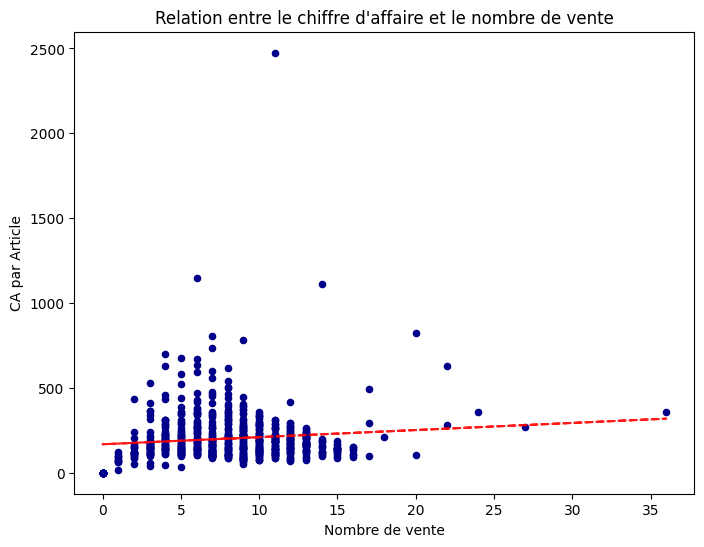

In [203]:
df_total.plot.scatter(x='total_sales', y='ca_par_article', alpha=1, color='darkblue', figsize=(8, 6))
plt.title("Relation entre le chiffre d'affaire et le nombre de vente")
plt.xlabel("Nombre de vente")
plt.ylabel("CA par Article")

z = np.polyfit(df_total['total_sales'], df_total['ca_par_article'], 1)
p = np.poly1d(z)
plt.plot(df_total['total_sales'], p(df_total['total_sales']), "r--", alpha=0.9)

In [204]:
print(df_total["product_type"].value_counts())
print("Soit un total de ", df_total["product_type"].value_counts().sum(),"produits")

product_type
Vin              657
Champagne         28
Whisky            14
Cognac             8
Huile d'olive      3
Gin                2
Name: count, dtype: int64
Soit un total de  712 produits


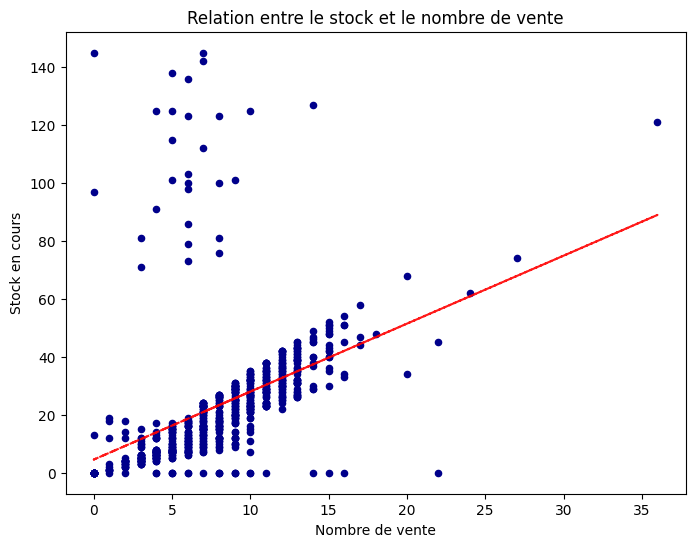

In [205]:
df_total.plot.scatter(x='total_sales', y='stock_quantity', alpha=1, color='darkblue', figsize=(8, 6))
plt.title("Relation entre le stock et le nombre de vente")
plt.xlabel("Nombre de vente")
plt.ylabel("Stock en cours")

z = np.polyfit(df_total['total_sales'], df_total['stock_quantity'], 1)
p = np.poly1d(z)
plt.plot(df_total['total_sales'], p(df_total['total_sales']), "r--", alpha=0.9)

In [206]:
df_total.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,post_author,...,post_modified,post_modified_gmt,guid,post_type,post_mime_type,ca_par_article,Part_Sales,Part_Sales_cumul,Rotation_Stock,Valorisation_Stock
0,4729.0,1.0,8.6,26.0,instock,4.22,38,10.0,taxable,2.0,...,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,86.0,0.174307,0.174307,2.600000,109.72
1,4634.0,1.0,41.0,11.0,instock,20.12,41,6.0,taxable,2.0,...,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,246.0,0.104584,0.278891,1.833333,221.32


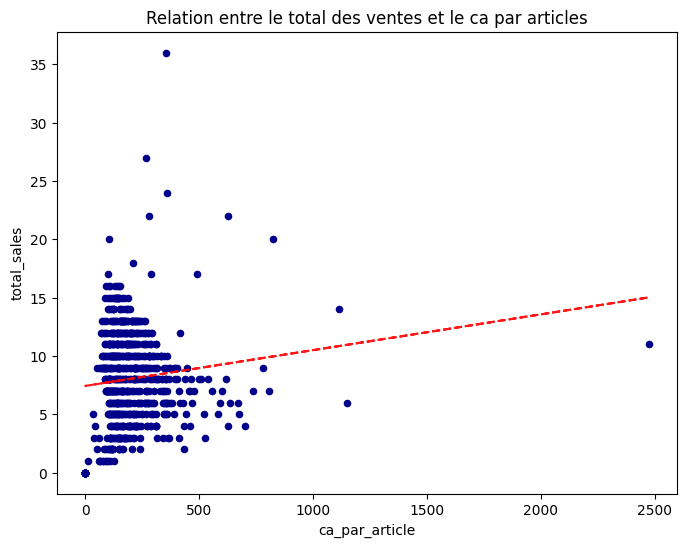

In [207]:
df_total.plot.scatter(x='ca_par_article', y='total_sales', alpha=1, color='darkblue', figsize=(8, 6))
plt.title("Relation entre le total des ventes et le ca par articles")
plt.xlabel("ca_par_article")
plt.ylabel("total_sales")

z = np.polyfit(df_total['ca_par_article'], df_total['total_sales'], 1)
p = np.poly1d(z)
plt.plot(df_total['ca_par_article'], p(df_total['ca_par_article']), "r--", alpha=0.9)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [208]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_total["Prix_HT"]=df_total["price"]/1.2
#Création de la colonne Taux de marge
df_total["Taux_marge"] = round(((df_total["Prix_HT"]-df_total["purchase_price"])/df_total["purchase_price"])*100,2)
#Afficher le prix minimum de la colonne "taux_marge"
print("Le prix minimum de la colonne taux_de marge est de {}%".format(df_total["Taux_marge"].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("Le prix maximum de la colonne taux_de marge est de {}%".format(df_total["Taux_marge"].max()))

Le prix minimum de la colonne taux_de marge est de -86.39%
Le prix maximum de la colonne taux_de marge est de 91.41%


/var/folders/nh/n9hljk5x7bs7pspl75v9v2mh0000gn/T/ipykernel_22191/3020471661.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nh/n9hljk5x7bs7pspl75v9v2mh0000gn/T/ipykernel_22191/3020471661.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
#affichage de la ligne avec un taux de marge inférieur à 0

In [210]:
df_total.loc[df_total["Taux_marge"]<0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,post_author,...,guid,post_type,post_mime_type,ca_par_article,Part_Sales,Part_Sales_cumul,Rotation_Stock,Valorisation_Stock,Prix_HT,Taux_marge
79,4355.0,1.0,12.65,97.0,instock,77.48,12589,0.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0,0.0,7.930974,0.0,7515.56,10.541667,-86.39


In [211]:
#création d'un dataframe avec les taux positifs
df_total = df_total.loc[df_total["Taux_marge"]>0]
#Afficher le prix minimum de la colonne "taux_marge"
print("Le prix minimum de la colonne taux_de marge est de {}%".format(df_total["Taux_marge"].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("Le prix maximum de la colonne taux_de marge est de {}%".format(df_total["Taux_marge"].max()))

Le prix minimum de la colonne taux_de marge est de 29.5%
Le prix maximum de la colonne taux_de marge est de 91.41%


In [212]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_total_moy = df_total.groupby("product_type", as_index=False)["Taux_marge"].mean()
#Affichage dans un graphique du taux de marge par type de produit


In [213]:
df_total_moy

,product_type,Taux_marge
0,Champagne,39.954444
1,Cognac,82.315000
2,Gin,74.830000
3,Huile d'olive,33.390000
4,Vin,61.505982
5,Whisky,81.738571


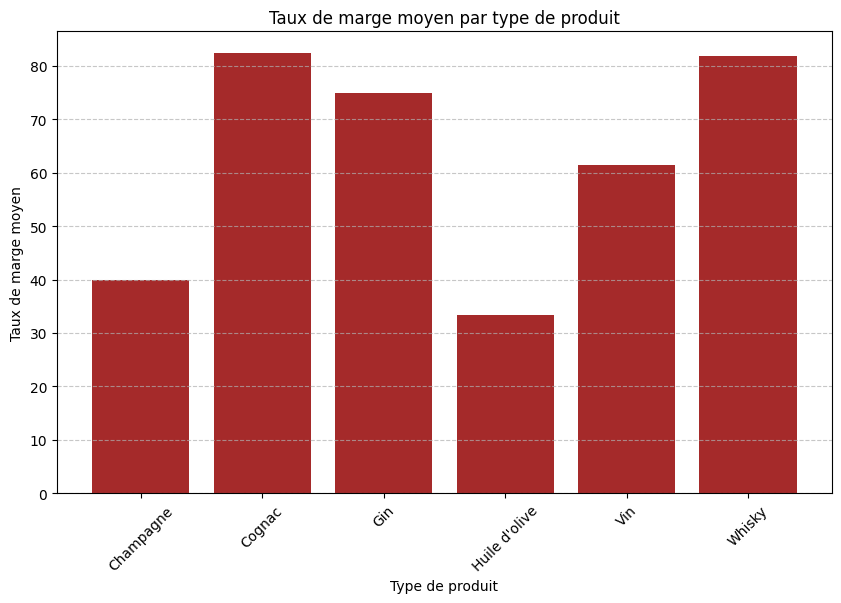

In [214]:
plt.figure(figsize=(10, 6))
plt.bar(df_total_moy["product_type"], df_total_moy["Taux_marge"], color="brown")

# Personnalisation
plt.xlabel("Type de produit")
plt.ylabel("Taux de marge moyen")
plt.title("Taux de marge moyen par type de produit")
plt.xticks(rotation=45)  # Rotation des labels si nécessaire
plt.grid(axis="y", linestyle="--", alpha=0.7)

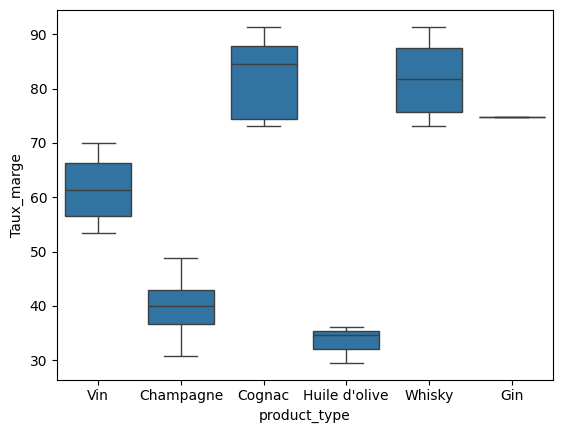

In [215]:
sns.boxplot(y='Taux_marge', x='product_type', data=df_total, orient='v')
plt.show()

In [216]:
df_total.loc[df_total["product_type"]=="Gin"]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,post_author,...,guid,post_type,post_mime_type,ca_par_article,Part_Sales,Part_Sales_cumul,Rotation_Stock,Valorisation_Stock,Prix_HT,Taux_marge
41,5913.0,1.0,36.0,7.0,instock,17.16,10014,10.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,360.0,0.174307,3.921910,0.7,120.12,30.0,74.83
174,5914.0,1.0,36.0,4.0,instock,17.16,14265,4.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,144.0,0.069723,18.668294,1.0,68.64,30.0,74.83


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

In [217]:
df_total.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,post_author,...,guid,post_type,post_mime_type,ca_par_article,Part_Sales,Part_Sales_cumul,Rotation_Stock,Valorisation_Stock,Prix_HT,Taux_marge
0,4729.0,1.0,8.6,26.0,instock,4.22,38,10.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,86.0,0.174307,0.174307,2.600000,109.72,7.166667,69.83
1,4634.0,1.0,41.0,11.0,instock,20.12,41,6.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,246.0,0.104584,0.278891,1.833333,221.32,34.166667,69.81
2,4141.0,1.0,39.0,123.0,instock,24.86,304,8.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,312.0,0.139446,0.418337,15.375000,3057.78,32.500000,30.73
3,5932.0,1.0,59.9,13.0,instock,27.18,523,0.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0,0.000000,0.418337,0.000000,353.34,49.916667,83.65
4,5047.0,1.0,22.5,76.0,instock,13.78,531,8.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,180.0,0.139446,0.557783,9.500000,1047.28,18.750000,36.07


In [218]:
df_total.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,post_author,...,guid,post_type,post_mime_type,ca_par_article,Part_Sales,Part_Sales_cumul,Rotation_Stock,Valorisation_Stock,Prix_HT,Taux_marge
0,4729.0,1.0,8.6,26.0,instock,4.22,38,10.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,86.0,0.174307,0.174307,2.600000,109.72,7.166667,69.83
1,4634.0,1.0,41.0,11.0,instock,20.12,41,6.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,246.0,0.104584,0.278891,1.833333,221.32,34.166667,69.81
2,4141.0,1.0,39.0,123.0,instock,24.86,304,8.0,taxable,2.0,...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,312.0,0.139446,0.418337,15.375000,3057.78,32.500000,30.73


In [219]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
Correlation = df_total[['stock_quantity',  'total_sales', 'price']].corr()
#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(Correlation, dtype=bool))

In [220]:
Correlation

,stock_quantity,total_sales,price
stock_quantity,1.000000,0.452441,-0.103668
total_sales,0.452441,1.000000,-0.518901
price,-0.103668,-0.518901,1.000000


<Axes: >

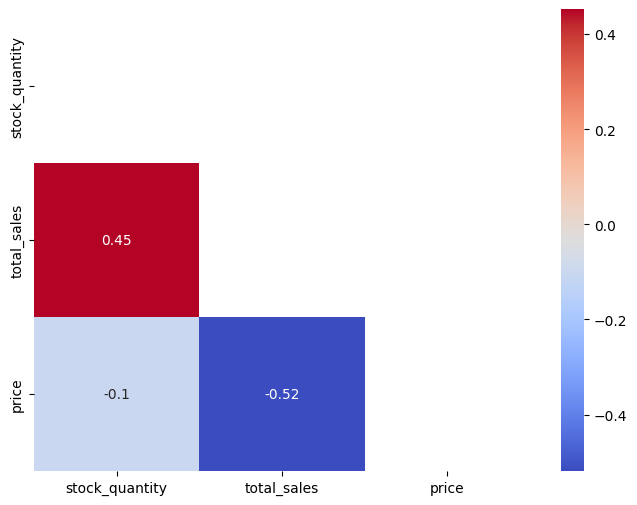

In [221]:
plt.figure(figsize=(8, 6))
sns.heatmap(Correlation, annot=True, cmap='coolwarm', mask=mask)


In [222]:
#Que peut-on conclure des correlations ?
# 1 Mesure correlée négative entre prix et total des ventes : Plus le prix augmente, et plus les ventes baisses
# 2 Mesure correlée positive entre total des ventes et le stock : Plus il y a de stock et plus les ventes augmentent.
# 3 Légère mesure correlée négative entre le prix et le stock : Plus il y a de stock, les prix ont légèrement tendance à diminuer

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [223]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_total.to_excel("BottleneckAnalyse.xlsx", index=False)